<a href="https://colab.research.google.com/github/4dh/AppRegressionHW/blob/master/Regression_HW10b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initial statements for numpy and pandas packages
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from statsmodels.api import robust
import matplotlib.pyplot as plt
import matplotlib as mpl 
from mpl_toolkits.mplot3d import Axes3D 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CH11PR12.txt to CH11PR12.txt


In [ ]:
htwt = pd.read_csv('CH11PR12.txt', delimiter='\s+',
            names = ['Y (Weight, lbs)', 'X (Height, in.)'])

#Let's see what a sample of 5 rows looks like to verify that data frame is as expected
htwt.sample(5)

,"Y (Weight, lbs)","X (Height, in.)"
7,171,69
19,137,67
15,134,66
2,216,72
17,177,69


In [ ]:
X = htwt['X (Height, in.)'] 
y = htwt['Y (Weight, lbs)']
## fit a OLS 
X = sm.add_constant(X)
htwtfit = sm.OLS(y, X).fit()
htwtfit.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Y (Weight, lbs)   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     11.31
Date:                Tue, 26 Nov 2019   Prob (F-statistic):            0.00346
Time:                        08:57:20   Log-Likelihood:                -85.964
No. Observations:                  20   AIC:                             175.9
Df Residuals:                      18   BIC:                             177.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -193.9236    108.313     -1.790      0.090    -421.480      33.633
X (Height, in.)     5.2484      1.561      3.363      0.003       1.970       8.527
==============================================================================
Omnibus:                        5.635   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.581
Skew:                           1.002   Prob(JB):                        0.167
Kurtosis:                       3.530   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

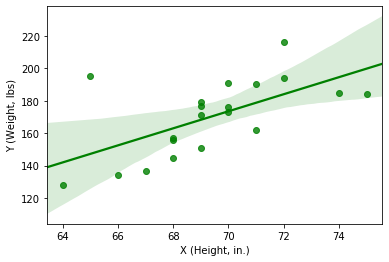

In [ ]:
X = htwt['X (Height, in.)'] 
y = htwt['Y (Weight, lbs)']
ax = sns.regplot(x=X, y=y, color="g")

In [ ]:
hw_fitted_y = htwtfit.fittedvalues
htwt['Yfit'] = hw_fitted_y

hw_residuals = htwtfit.resid
htwt['Res'] = hw_residuals

# cook's distance, from statsmodels internals
hw_cooks = htwtfit.get_influence().cooks_distance[0]
htwt['Cooks distance'] = hw_cooks

#index column
htwt['Index'] = list(range(len(htwt.index)))

htwt.head(5)


,"Y (Weight, lbs)","X (Height, in.)",Yfit,Res,Cooks distance,Index
0,185,74,194.454860,-9.454860,0.039550,0
1,195,65,147.219647,47.780353,0.874227,1
2,216,72,183.958146,32.041854,0.176896,2
3,156,68,162.964718,-6.964718,0.004908,3
4,179,69,168.213075,10.786925,0.009327,4


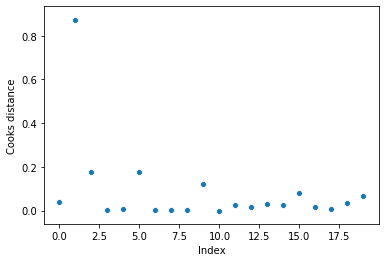

In [ ]:
X = htwt['Index']
y = htwt['Cooks distance']
ax = sns.scatterplot(x=X, y=y)

In [ ]:

mad = sm.robust.scale.mad(htwt['Y (Weight, lbs)'])
htwt['ui'] = htwt['Res']/mad

#htwt.head(20)
htwt['ui'] 


#Huber
htwt['Huber'] = np.where(htwt['ui']> 1.345, (1.345/abs(htwt['ui'])), 1)

print(htwt.loc[:,['Y (Weight, lbs)', 'X (Height, in.)', 'ui', 'Huber']])


    Y (Weight, lbs)  X (Height, in.)        ui    Huber
0               185               74 -0.375130  1.00000
1               195               65  1.895727  0.70949
2               216               72  1.271288  1.00000
3               156               68 -0.276331  1.00000
4               179               69  0.427981  1.00000
5               184               75 -0.623039  1.00000
6               157               68 -0.236655  1.00000
7               171               69  0.110574  1.00000
8               176               70  0.100720  1.00000
9               128               64 -0.554323  1.00000
10              173               70 -0.018308  1.00000
11              191               70  0.695858  1.00000
12              190               71  0.447949  1.00000
13              162               71 -0.662975  1.00000
14              151               69 -0.682944  1.00000
15              134               66 -0.732734  1.00000
16              194               72  0.398419  

In [ ]:
#IT 2
X = htwt['X (Height, in.)'] 
y = htwt['Y (Weight, lbs)']
## fit a OLS 
X = sm.add_constant(X)
htwtfitH = sm.WLS(y, X, weights= htwt['Huber']).fit()
htwtfitH.summary()
resh1 = htwtfitH.resid
htwt['ResH1'] = resh1

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
mad2 = sm.robust.scale.mad(htwt['Y (Weight, lbs)'])
htwt['ui2'] = htwt['ResH1']/mad2

#htwt.head(20)
htwt['ui2'] 

#Huber
htwt['Huber2'] = np.where(htwt['ui2']> 1.345, (1.345/abs(htwt['ui2'])), 1)

print(htwt.loc[:,['Y (Weight, lbs)', 'X (Height, in.)', 'ui', 'Huber', 'ui2', 'Huber2']])

    Y (Weight, lbs)  X (Height, in.)        ui    Huber       ui2    Huber2
0               185               74 -0.375130  1.00000 -0.427406  1.000000
1               195               65  1.895727  0.70949  2.000883  0.672203
2               216               72  1.271288  1.00000  1.253997  1.000000
3               156               68 -0.276331  1.00000 -0.223652  1.000000
4               179               69  0.427981  1.00000  0.463167  1.000000
5               184               75 -0.623039  1.00000 -0.692808  1.000000
6               157               68 -0.236655  1.00000 -0.183977  1.000000
7               171               69  0.110574  1.00000  0.145760  1.000000
8               176               70  0.100720  1.00000  0.118414  1.000000
9               128               64 -0.554323  1.00000 -0.431674  1.000000
10              173               70 -0.018308  1.00000 -0.000614  1.000000
11              191               70  0.695858  1.00000  0.713552  1.000000
12          

In [ ]:
#IT 3
X = htwt['X (Height, in.)'] 
y = htwt['Y (Weight, lbs)']
## fit a OLS 
X = sm.add_constant(X)
htwtfitH2 = sm.WLS(y, X, weights= htwt['Huber2']).fit()
htwtfitH2.summary()
resh2j = htwtfitH2.resid
htwt['ResH2'] = resh2j

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
mad2 = sm.robust.scale.mad(htwt['Y (Weight, lbs)'])
htwt['ui3'] = htwt['ResH2']/mad2

#htwt.head(20)
htwt['ui3'] 

#Huber
htwt['Huber3'] = np.where(htwt['ui3']> 1.345, (1.345/abs(htwt['ui3'])), 1)

print(htwt.loc[:,['Y (Weight, lbs)', 'X (Height, in.)', 'ui', 'Huber', 'ui2', 'Huber2', 'ui3', 'Huber3']])

    Y (Weight, lbs)  X (Height, in.)        ui  ...    Huber2       ui3    Huber3
0               185               74 -0.375130  ...  1.000000 -0.434539  1.000000
1               195               65  1.895727  ...  0.672203  2.015231  0.667417
2               216               72  1.271288  ...  1.000000  1.251638  1.000000
3               156               68 -0.276331  ...  1.000000 -0.216465  1.000000
4               179               69  0.427981  ...  1.000000  0.467968  1.000000
5               184               75 -0.623039  ...  1.000000 -0.702327  1.000000
6               157               68 -0.236655  ...  1.000000 -0.176789  1.000000
7               171               69  0.110574  ...  1.000000  0.150561  1.000000
8               176               70  0.100720  ...  1.000000  0.120828  1.000000
9               128               64 -0.554323  ...  1.000000 -0.414940  1.000000
10              173               70 -0.018308  ...  1.000000  0.001800  1.000000
11              

In [ ]:
#IT 3
X = htwt['X (Height, in.)'] 
y = htwt['Y (Weight, lbs)']
## fit a OLS 
X = sm.add_constant(X)
htwtfitH3 = sm.WLS(y, X, weights= htwt['Huber3']).fit()
htwtfitH3.summary()


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:        Y (Weight, lbs)   R-squared:                       0.453
Model:                            WLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     14.91
Date:                Tue, 26 Nov 2019   Prob (F-statistic):            0.00115
Time:                        11:21:15   Log-Likelihood:                -84.802
No. Observations:                  20   AIC:                             173.6
Df Residuals:                      18   BIC:                             175.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -230.0560    103.598     -2.221      0.039    -447.707     -12.405
X (Height, in.)     5.7572      1.491      3.861      0.001       2.624       8.890
==============================================================================
Omnibus:                        3.351   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.248
Skew:                           0.821   Prob(JB):                        0.325
Kurtosis:                       2.971   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""